# Waster Water Management in Musi River

# Preprocessing Year-wise data

In [128]:
df = pd.read_csv("Data/Musi_year_wise.csv")
df.replace('-', np.nan, inplace=True)
df.dropna(inplace=True)
def clean_value(x):
    if isinstance(x, str) and x.startswith('<'):
        return float(x[1:])
    return float(x)
for col in df.columns[1:]:
    df[col] = df[col].apply(clean_value)
print(df)

     Station Name   DO    pH  Conductivity   BOD  Coliform  Ammonia  Boron  \
0        Gandipet  5.1  6.10         209.0   2.0     300.0     1.00   0.01   
1        Bapughat  2.1  7.50         928.0  36.0    5213.0     1.00   0.20   
2    Moosarambagh  0.7  7.56        1417.0  58.0    6220.0     1.00   0.30   
3          Nagole  3.9  7.76        1211.0  29.0      97.0     1.00   0.25   
4    Peerjadiguda  0.3  7.55        1378.0  43.0    6840.0     1.00   0.18   
..            ...  ...   ...           ...   ...       ...      ...    ...   
103   Rudravelly   5.7  7.50        1453.0   5.0     108.0     0.01   0.50   
104     Valigonda  6.0  7.62        1454.0   5.0     112.0     0.01   0.50   
105    Kasaniguda  6.3  7.83        1355.0   4.0      70.0     0.01   0.50   
106     Bheemaram  6.1  7.84        1333.0   3.4      35.0     0.01   0.50   
107     Wadapally  6.2  8.03        1024.0   2.8      42.0     0.01   0.50   

     SAR    Year  
0    0.9  2014.0  
1    1.2  2014.0  
2    1

## Mann-Kendall Test for Trend Analysis

In [129]:
columns = df.columns[1:]
results = []
for param in columns:
    for station in df['Station Name'].unique():
        data = df[df['Station Name'] == station]
        result = mk.original_test(data[param], alpha=0.05)
        if result.p < 0.05:
            results.append([station, param, result.trend, result.p])
results_df = pd.DataFrame(results, columns=['Station', 'Parameter', 'Trend', 'p-value'])
print(results_df)

            Station Parameter       Trend   p-value
0          Gandipet        DO  increasing  0.002499
1          Bapughat       BOD  decreasing  0.035448
2      Moosarambagh       BOD  decreasing  0.004879
3      Peerjadiguda       BOD  decreasing  0.006420
4      Pillaipalli        BOD  decreasing  0.016489
5      Moosarambagh  Coliform  decreasing  0.016489
6      Pillaipalli   Coliform  decreasing  0.028568
7          Gandipet   Ammonia  decreasing  0.042040
8          Bapughat   Ammonia  decreasing  0.046302
9      Moosarambagh   Ammonia  decreasing  0.003972
10           Nagole   Ammonia  decreasing  0.019244
11     Peerjadiguda   Ammonia  decreasing  0.008051
12  Pratapasingaram   Ammonia  decreasing  0.008169
13     Pillaipalli    Ammonia  decreasing  0.003972
14       Kasaniguda     Boron  decreasing  0.047604
15         Bapughat       SAR  increasing  0.001189
16     Moosarambagh       SAR  increasing  0.011873
17     Peerjadiguda       SAR  increasing  0.008408
18  Pratapas

## Multiple Regression Analysis for Prediction

In [130]:
data = pd.read_csv("Data/Musi_2020_station_wise.csv")
df = data
df.replace('-', np.nan, inplace=True)
df.dropna(inplace=True)
def clean_value(x):
    if isinstance(x, str) and (x.startswith('<') or x.startswith('>')):
        return float(x[1:])
    return float(x)
columns = df.columns[1:]
# drop the last column in columns
columns = columns[:-1]
for col in columns:
    df[col] = df[col].apply(clean_value)
# print(df)

### Predicting SAR using Conductivity, pH, Ammonia , Boron as Independent Variables

Index(['Month', 'DO', 'pH', 'Conductivity', 'BOD', 'Coliform', 'Ammonia',
       'Boron', 'SAR', 'Location'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    SAR   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     6.620
Date:                Thu, 18 Apr 2024   Prob (F-statistic):            0.00164
Time:                        01:09:29   Log-Likelihood:                -33.065
No. Observations:                  24   AIC:                             76.13
Df Residuals:                      19   BIC:                             82.02
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.97

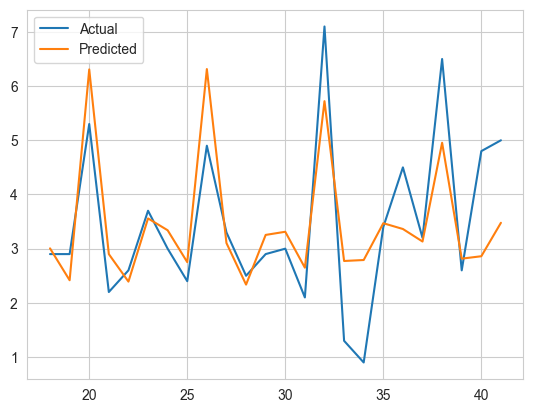

ANOVA Table (Variation)
+---------------------+-----------+----+----------+
| Source of Variation |    SS     | df |    MS    |
+---------------------+-----------+----+----------+
|   Between Groups    | 7.885000  | 3  | 2.628333 |
|    Within Groups    | 45.013333 | 20 | 2.250667 |
|        Total        | 52.898333 | 23 |          |
+---------------------+-----------+----+----------+

ANOVA Table (F-Value)
+---------------------+----------+----------+----------+
| Source of Variation |    F     | p-value  |  F crit  |
+---------------------+----------+----------+----------+
|   Between Groups    | 1.167802 | 0.346774 | 3.098391 |
|    Within Groups    |          |          |          |
|        Total        |          |          |          |
+---------------------+----------+----------+----------+


In [131]:
import statsmodels.api as sm
from tabulate import tabulate
print(df.columns)
locations_to_keep = ['Nagole','Peerjadiguda','Pratapasingaram','Pillaipalli']
df_filtered = df[df['Location'].isin(locations_to_keep)]
X = df_filtered[['Conductivity', 'Boron','Ammonia','pH']]
y = df_filtered['SAR']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
# plot line chart of predicted vs actual
y_pred = model.predict(X)
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

nagole_group_SAR = df[df['Location'] == 'Nagole']['SAR']
peerjadiguda_group_SAR = df[df['Location'] == 'Peerjadiguda']['SAR']
pratapasingaram_group_SAR = df[df['Location'] == 'Pratapasingaram']['SAR']
pillaipalli_group_SAR = df[df['Location'] == 'Pillaipalli']['SAR']
from scipy.stats import f
k = 4
N = len(nagole_group_SAR) + len(peerjadiguda_group_SAR) + len(pratapasingaram_group_SAR) + len(pillaipalli_group_SAR)
group_means = [np.mean(nagole_group_SAR), np.mean(peerjadiguda_group_SAR), np.mean(pratapasingaram_group_SAR), np.mean(pillaipalli_group_SAR)]
grand_mean = np.mean([np.mean(nagole_group_SAR), np.mean(peerjadiguda_group_SAR), np.mean(pratapasingaram_group_SAR), np.mean(pillaipalli_group_SAR)])
SSb = sum([len(nagole_group_SAR) * (group_means[0] - grand_mean) ** 2,
           len(peerjadiguda_group_SAR) * (group_means[1] - grand_mean) ** 2,
           len(pratapasingaram_group_SAR) * (group_means[2] - grand_mean) ** 2,
           len(pillaipalli_group_SAR) * (group_means[3] - grand_mean) ** 2])
dfb = k-1
MSb = SSb / dfb
SSw = sum([(x - group_means[i]) ** 2 for i, data in enumerate([nagole_group_SAR, peerjadiguda_group_SAR, pratapasingaram_group_SAR, pillaipalli_group_SAR]) for x in data])
dfw = N-k
MSw = SSw / dfw
F_value = MSb / MSw
alpha = 0.05
F_crit = f.ppf(1 - alpha, dfb, dfw)
p_value = 1-f.cdf(F_value, dfb, dfw)

# Generate ANOVA tables
anova_table_variation = [
    ["Between Groups", f"{SSb:.6f}", dfb, f"{MSb:.6f}"],
    ["Within Groups", f"{SSw:.6f}", dfw, f"{MSw:.6f}"],
    ["Total", f"{SSb+SSw:.6f}", dfb+dfw]
]

anova_table_f = [
    ["Between Groups", f"{F_value:.6f}",f"{p_value:.6f}" ,f"{F_crit:.6f}"],
    ["Within Groups"],
    ["Total"]
]

# Print ANOVA tables
print("ANOVA Table (Variation)")
print(tabulate(anova_table_variation, headers=["Source of Variation", "SS", "df", "MS"], tablefmt="pretty"))
print("\nANOVA Table (F-Value)")
print(tabulate(anova_table_f, headers=["Source of Variation", "F", "p-value","F crit"], tablefmt="pretty"))

### Predciting Conductivity using SAR, pH, Ammonia, Boron as Independent Variables

                            OLS Regression Results                            
Dep. Variable:           Conductivity   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     6.091
Date:                Thu, 18 Apr 2024   Prob (F-statistic):            0.00279
Time:                        01:09:29   Log-Likelihood:                -208.36
No. Observations:                  30   AIC:                             424.7
Df Residuals:                      26   BIC:                             430.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        227.1930   1277.347      0.178      0.8

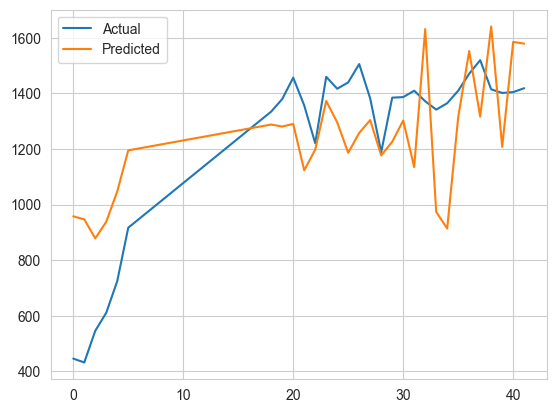

ANOVA Table (Variation)
+---------------------+---------------+----+-------------+
| Source of Variation |      SS       | df |     MS      |
+---------------------+---------------+----+-------------+
|   Between Groups    | 17271.458333  | 3  | 5757.152778 |
|    Within Groups    | 111110.166667 | 20 | 5555.508333 |
|        Total        | 128381.625000 | 23 |             |
+---------------------+---------------+----+-------------+

ANOVA Table (F-Value)
+---------------------+----------+----------+----------+
| Source of Variation |    F     | p-value  |  F crit  |
+---------------------+----------+----------+----------+
|   Between Groups    | 1.036296 | 0.397895 | 3.098391 |
|    Within Groups    |          |          |          |
|        Total        |          |          |          |
+---------------------+----------+----------+----------+


In [132]:
locations_to_keep = ['Nagole','Peerjadiguda','Pratapasingaram','Pillaipalli','Gandipet']
df_filtered = df[df['Location'].isin(locations_to_keep)]
X = df_filtered[['SAR', 'Boron','pH']]
y = df_filtered['Conductivity']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
# plot line chart of predicted vs actual
y_pred = model.predict(X)
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

nagole_group_Conductivity = df[df['Location'] == 'Nagole']['Conductivity']
peerjadiguda_group_Conductivity = df[df['Location'] == 'Peerjadiguda']['Conductivity']
pratapasingaram_group_Conductivity = df[df['Location'] == 'Pratapasingaram']['Conductivity']
pillaipalli_group_Conductivity = df[df['Location'] == 'Pillaipalli']['Conductivity']

k = 4
N = len(nagole_group_Conductivity) + len(peerjadiguda_group_Conductivity) + len(pratapasingaram_group_Conductivity) + len(pillaipalli_group_Conductivity)
group_means = [np.mean(nagole_group_Conductivity), np.mean(peerjadiguda_group_Conductivity), np.mean(pratapasingaram_group_Conductivity), np.mean(pillaipalli_group_Conductivity)]
grand_mean = np.mean([np.mean(nagole_group_Conductivity), np.mean(peerjadiguda_group_Conductivity), np.mean(pratapasingaram_group_Conductivity), np.mean(pillaipalli_group_Conductivity)])
SSb = sum([len(nagole_group_Conductivity) * (group_means[0] - grand_mean) ** 2,
           len(peerjadiguda_group_Conductivity) * (group_means[1] - grand_mean) ** 2,
           len(pratapasingaram_group_Conductivity) * (group_means[2] - grand_mean) ** 2,
           len(pillaipalli_group_Conductivity) * (group_means[3] - grand_mean) ** 2])
dfb = k-1
MSb = SSb / dfb
SSw = sum([(x - group_means[i]) ** 2 for i, data in enumerate([nagole_group_Conductivity, peerjadiguda_group_Conductivity, pratapasingaram_group_Conductivity, pillaipalli_group_Conductivity]) for x in data])
dfw = N-k
MSw = SSw / dfw
F_value = MSb / MSw
alpha = 0.05
F_crit = f.ppf(1 - alpha, dfb, dfw)
p_value = 1-f.cdf(F_value, dfb, dfw)

# Generate ANOVA tables
anova_table_variation = [
    ["Between Groups", f"{SSb:.6f}", dfb, f"{MSb:.6f}"],
    ["Within Groups", f"{SSw:.6f}", dfw, f"{MSw:.6f}"],
    ["Total", f"{SSb+SSw:.6f}", dfb+dfw]
]

anova_table_f = [
    ["Between Groups", f"{F_value:.6f}",f"{p_value:.6f}" ,f"{F_crit:.6f}"],
    ["Within Groups"],
    ["Total"]
]

# Print ANOVA tables
print("ANOVA Table (Variation)")
print(tabulate(anova_table_variation, headers=["Source of Variation", "SS", "df", "MS"], tablefmt="pretty"))
print("\nANOVA Table (F-Value)")
print(tabulate(anova_table_f, headers=["Source of Variation", "F", "p-value","F crit"], tablefmt="pretty"))

### Predicitng BOD using SAR, DO, pH as Independent Variables

                            OLS Regression Results                            
Dep. Variable:                    BOD   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     2.936
Date:                Thu, 18 Apr 2024   Prob (F-statistic):             0.0583
Time:                        01:09:29   Log-Likelihood:                -79.813
No. Observations:                  24   AIC:                             167.6
Df Residuals:                      20   BIC:                             172.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1025     43.554     -0.025      0.9

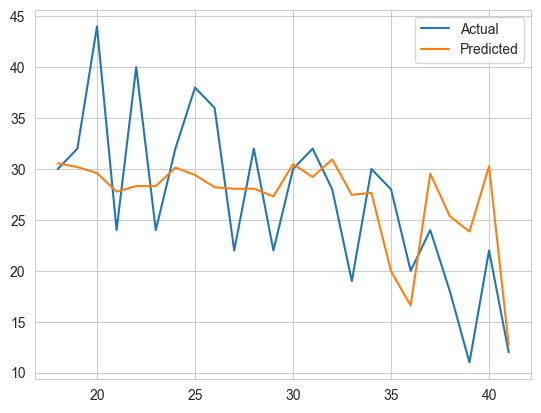

ANOVA Table (Variation)
+---------------------+-------------+----+------------+
| Source of Variation |     SS      | df |     MS     |
+---------------------+-------------+----+------------+
|   Between Groups    | 745.500000  | 3  | 248.500000 |
|    Within Groups    | 820.333333  | 20 | 41.016667  |
|        Total        | 1565.833333 | 23 |            |
+---------------------+-------------+----+------------+

ANOVA Table (F-Value)
+---------------------+----------+----------+----------+
| Source of Variation |    F     | p-value  |  F crit  |
+---------------------+----------+----------+----------+
|   Between Groups    | 6.058513 | 0.004167 | 3.098391 |
|    Within Groups    |          |          |          |
|        Total        |          |          |          |
+---------------------+----------+----------+----------+


In [133]:
locations_to_keep = ['Nagole','Peerjadiguda','Pratapasingaram','Pillaipalli']
df_filtered = df[df['Location'].isin(locations_to_keep)]
X = df_filtered[['SAR', 'DO','pH']]
y = df_filtered['BOD']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
# plot line chart of predicted vs actual
y_pred = model.predict(X)
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

nagole_group_BOD = df[df['Location'] == 'Nagole']['BOD']
peerjadiguda_group_BOD = df[df['Location'] == 'Peerjadiguda']['BOD']
pratapasingaram_group_BOD = df[df['Location'] == 'Pratapasingaram']['BOD']
pillaipalli_group_BOD = df[df['Location'] == 'Pillaipalli']['BOD']
k = 4
N = len(nagole_group_BOD) + len(peerjadiguda_group_BOD) + len(pratapasingaram_group_BOD) + len(pillaipalli_group_BOD)
group_means = [np.mean(nagole_group_BOD), np.mean(peerjadiguda_group_BOD), np.mean(pratapasingaram_group_BOD), np.mean(pillaipalli_group_BOD)]
grand_mean = np.mean([np.mean(nagole_group_BOD), np.mean(peerjadiguda_group_BOD), np.mean(pratapasingaram_group_BOD), np.mean(pillaipalli_group_BOD)])
SSb = sum([len(nagole_group_BOD) * (group_means[0] - grand_mean) ** 2,
           len(peerjadiguda_group_BOD) * (group_means[1] - grand_mean) ** 2,
           len(pratapasingaram_group_BOD) * (group_means[2] - grand_mean) ** 2,
           len(pillaipalli_group_BOD) * (group_means[3] - grand_mean) ** 2])
dfb = k-1
MSb = SSb / dfb
SSw = sum([(x - group_means[i]) ** 2 for i, data in enumerate([nagole_group_BOD, peerjadiguda_group_BOD, pratapasingaram_group_BOD, pillaipalli_group_BOD]) for x in data])
dfw = N-k
MSw = SSw / dfw
F_value = MSb / MSw
alpha = 0.05
F_crit = f.ppf(1 - alpha, dfb, dfw)
p_value = 1-f.cdf(F_value, dfb, dfw)

# Generate ANOVA tables
anova_table_variation = [
    ["Between Groups", f"{SSb:.6f}", dfb, f"{MSb:.6f}"],
    ["Within Groups", f"{SSw:.6f}", dfw, f"{MSw:.6f}"],
    ["Total", f"{SSb+SSw:.6f}", dfb+dfw]
]

anova_table_f = [
    ["Between Groups", f"{F_value:.6f}",f"{p_value:.6f}" ,f"{F_crit:.6f}"],
    ["Within Groups"],
    ["Total"]
]

# Print ANOVA tables
print("ANOVA Table (Variation)")
print(tabulate(anova_table_variation, headers=["Source of Variation", "SS", "df", "MS"], tablefmt="pretty"))
print("\nANOVA Table (F-Value)")
print(tabulate(anova_table_f, headers=["Source of Variation", "F", "p-value","F crit"], tablefmt="pretty"))

### Predicitng DO using BOD, pH as Independent Variables

                            OLS Regression Results                            
Dep. Variable:                     DO   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     4.301
Date:                Thu, 18 Apr 2024   Prob (F-statistic):             0.0272
Time:                        01:09:29   Log-Likelihood:                -24.373
No. Observations:                  24   AIC:                             54.75
Df Residuals:                      21   BIC:                             58.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4957      3.858      0.906      0.3

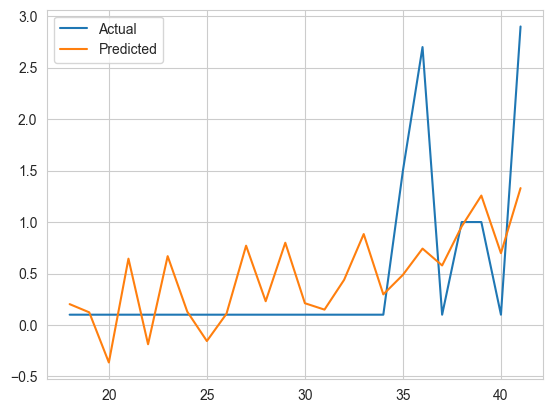

ANOVA Table (Variation)
+---------------------+-----------+----+----------+
| Source of Variation |    SS     | df |    MS    |
+---------------------+-----------+----+----------+
|   Between Groups    | 5.885000  | 3  | 1.961667 |
|    Within Groups    | 9.213333  | 20 | 0.460667 |
|        Total        | 15.098333 | 23 |          |
+---------------------+-----------+----+----------+

ANOVA Table (F-Value)
+---------------------+----------+----------+----------+
| Source of Variation |    F     | p-value  |  F crit  |
+---------------------+----------+----------+----------+
|   Between Groups    | 4.258321 | 0.017650 | 3.098391 |
|    Within Groups    |          |          |          |
|        Total        |          |          |          |
+---------------------+----------+----------+----------+


In [134]:
locations_to_keep = ['Nagole','Peerjadiguda','Pratapasingaram','Pillaipalli']
df_filtered = df[df['Location'].isin(locations_to_keep)]
X = df_filtered[['pH','BOD']]
y = df_filtered['DO']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
# plot line chart of predicted vs actual
y_pred = model.predict(X)
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

nagole_group_DO = df[df['Location'] == 'Nagole']['DO']
peerjadiguda_group_DO = df[df['Location'] == 'Peerjadiguda']['DO']
pratapasingaram_group_DO = df[df['Location'] == 'Pratapasingaram']['DO']
pillaipalli_group_DO = df[df['Location'] == 'Pillaipalli']['DO']

k = 4
N = len(nagole_group_DO) + len(peerjadiguda_group_DO) + len(pratapasingaram_group_DO) + len(pillaipalli_group_DO)
group_means = [np.mean(nagole_group_DO), np.mean(peerjadiguda_group_DO), np.mean(pratapasingaram_group_DO), np.mean(pillaipalli_group_DO)]
grand_mean = np.mean([np.mean(nagole_group_DO), np.mean(peerjadiguda_group_DO), np.mean(pratapasingaram_group_DO), np.mean(pillaipalli_group_DO)])
SSb = sum([len(nagole_group_DO) * (group_means[0] - grand_mean) ** 2,
           len(peerjadiguda_group_DO) * (group_means[1] - grand_mean) ** 2,
           len(pratapasingaram_group_DO) * (group_means[2] - grand_mean) ** 2,
           len(pillaipalli_group_DO) * (group_means[3] - grand_mean) ** 2])
dfb = k-1
MSb = SSb / dfb
SSw = sum([(x - group_means[i]) ** 2 for i, data in enumerate([nagole_group_DO, peerjadiguda_group_DO, pratapasingaram_group_DO, pillaipalli_group_DO]) for x in data])
dfw = N-k
MSw = SSw / dfw
F_value = MSb / MSw
alpha = 0.05
F_crit = f.ppf(1 - alpha, dfb, dfw)
p_value = 1-f.cdf(F_value, dfb, dfw)

# Generate ANOVA tables
anova_table_variation = [
    ["Between Groups", f"{SSb:.6f}", dfb, f"{MSb:.6f}"],
    ["Within Groups", f"{SSw:.6f}", dfw, f"{MSw:.6f}"],
    ["Total", f"{SSb+SSw:.6f}", dfb+dfw]
]

anova_table_f = [
    ["Between Groups", f"{F_value:.6f}",f"{p_value:.6f}" ,f"{F_crit:.6f}"],
    ["Within Groups"],
    ["Total"]
]

# Print ANOVA tables
print("ANOVA Table (Variation)")
print(tabulate(anova_table_variation, headers=["Source of Variation", "SS", "df", "MS"], tablefmt="pretty"))
print("\nANOVA Table (F-Value)")
print(tabulate(anova_table_f, headers=["Source of Variation", "F", "p-value","F crit"], tablefmt="pretty"))